In [1]:
import numpy as np
from matplotlib import pyplot as plt

from constraint import Constraint
from rxtrack import rxTrack, ExampleTracks
from car import Car

# Setup

In [2]:
track = rxTrack(0.5)

track.add_straight_section(500)
track.add_circular_section(100, np.pi * 100)
track.add_straight_section(250)
track.add_circular_section(50, np.pi * 50)

track.add_start_end_constraints()

In [68]:
ideal_car = Car(m = 300, mu_x = 1, mu_y = 1)
realistic_car = Car(300, 1, 1, 
                sim_engine = True, 
                drive_ratio = 4.0, 
                r_wheel = 0.254, 
                torque_csv = "torque_curve_data.csv",
                drag_coef = 0.3,
                frontal_area = 1.0,
                rho_air = 1.225)

In [69]:
output = track.solve(realistic_car)
print(f"Lap time: {output["lap_time"]} s")
print(f"Total energy: {output["total_energy"] / 10**6} MJ")

Lap time: 50.04405566769565 s
Total energy: 0.5883810098544466 MJ


# Data Analysis

In [70]:
ideal_output = track.solve(ideal_car)
realistic_output = track.solve(realistic_car)

In [71]:
print(f"Ideal lap time: {ideal_output["lap_time"]}, Realistic lap time: {realistic_output["lap_time"]}")
print(f"Energy ratio (realistic/ideal): {realistic_output["total_energy"]/ideal_output["total_energy"]}")

Ideal lap time: 36.30301461259661, Realistic lap time: 50.04405566769565
Energy ratio (realistic/ideal): 0.2583994983555805


### Speed vs Distance

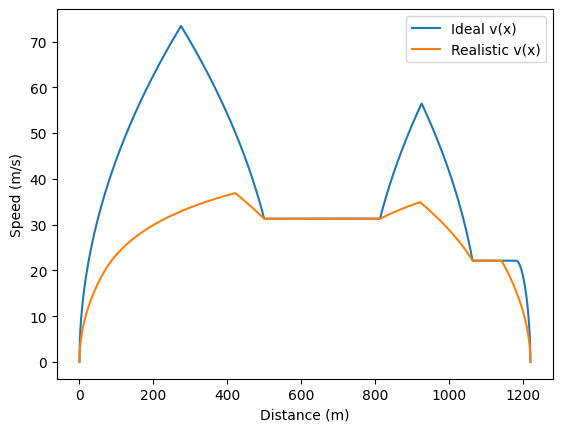

In [72]:
plt.plot(ideal_output["x_axis"], ideal_output["v(i)"], label="Ideal v(x)")
plt.plot(realistic_output["x_axis"], realistic_output["v(i)"], label="Realistic v(x)")
plt.legend()
plt.ylabel("Speed (m/s)")
plt.xlabel("Distance (m)")
plt.show()

### Speed vs Time

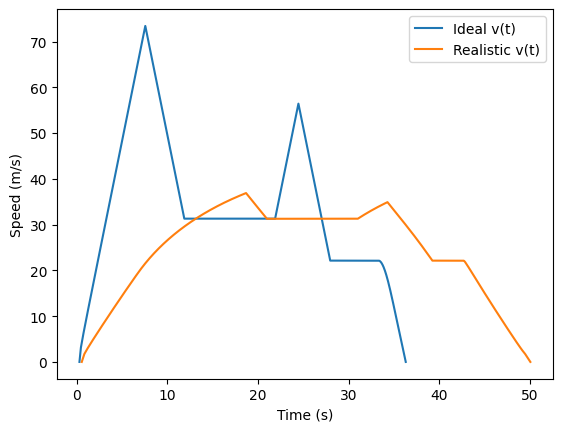

In [78]:
plt.plot(ideal_output["t_axis"], ideal_output["v(i)"], label="Ideal v(t)")
plt.plot(realistic_output["t_axis"], realistic_output["v(i)"], label="Realistic v(t)")
plt.legend()
plt.ylabel("Speed (m/s)")
plt.xlabel("Time (s)")
plt.show()

### Energy vs Distance

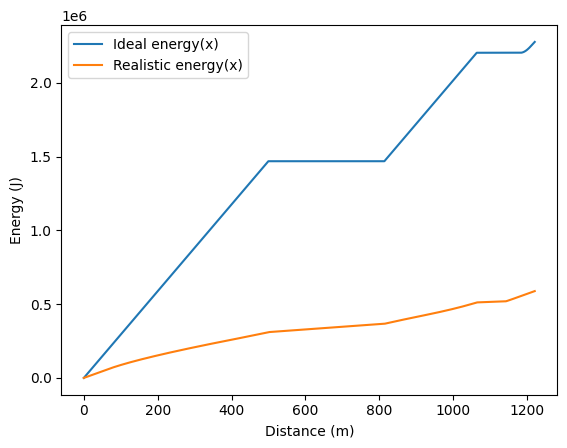

In [14]:
plt.plot(ideal_output["x_axis"], ideal_output["E(i)"], label="Ideal energy(x)")
plt.plot(realistic_output["x_axis"], realistic_output["E(i)"], label="Realistic energy(x)")
plt.legend()
plt.ylabel("Energy (J)")
plt.xlabel("Distance (m)")
plt.show()

### Combining: Time vs. Distance

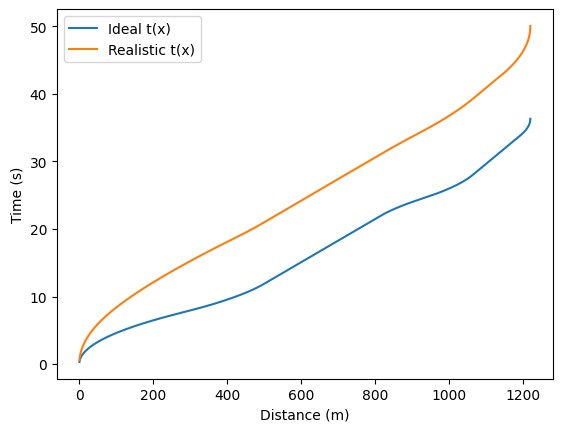

In [33]:
plt.plot(ideal_output["x_axis"], ideal_output["t_axis"], label="Ideal t(x)")
plt.plot(realistic_output["x_axis"], realistic_output["t_axis"], label="Realistic t(x)")
plt.legend()
plt.ylabel("Time (s)")
plt.xlabel("Distance (m)")
plt.show()

### Constraint Expansions & Accepted Speed

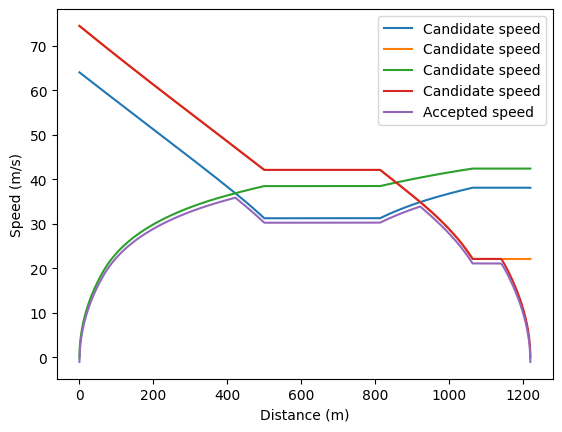

In [81]:

plt.plot(realistic_output["x_axis"], realistic_output["vs(i)"].T, label="Candidate speed")
plt.plot(realistic_output["x_axis"], realistic_output["v(i)"] - 1, label="Accepted speed")
plt.ylabel("Speed (m/s)")
plt.xlabel("Distance (m)")
plt.legend()
